# PyCaret 2 Classification Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [24]:
# check version
from pycaret.utils import version
version()

'2.1.2'

# 1. Data Repository

In [25]:
from pycaret.datasets import get_data
import pandas as pd
# data = get_data('juice')
data = pd.read_csv("../../datasets/juice.csv")
data.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


# 2. Initialize Setup

In [26]:
from pycaret.classification import *
clf1 = setup(data, target = 'Purchase', session_id=123, log_experiment=True, experiment_name='juice1')

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"CH: 0, MM: 1"
3,Original Data,"(1070, 19)"
4,Missing Values,False
5,Numeric Features,13
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# 3. Compare Baseline

In [27]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8263,0.8954,0.7262,0.8139,0.7644,0.628,0.6338,0.0913
1,Linear Discriminant Analysis,0.8263,0.8938,0.7536,0.7938,0.7713,0.6317,0.6342,0.0524
2,Ridge Classifier,0.8236,0,0.7499,0.792,0.768,0.6262,0.6292,0.0204
3,Ada Boost Classifier,0.8075,0.8637,0.7053,0.7837,0.7398,0.5881,0.5924,0.1468
4,Gradient Boosting Classifier,0.8062,0.8869,0.7363,0.7651,0.7479,0.5909,0.5939,0.2494
5,CatBoost Classifier,0.8049,0.8932,0.7326,0.7629,0.7457,0.5878,0.5899,1.669
6,Light Gradient Boosting Machine,0.7981,0.875,0.7325,0.7485,0.7356,0.5731,0.578,0.0853
7,Extreme Gradient Boosting,0.7914,0.8716,0.7294,0.7367,0.7309,0.5609,0.5633,0.2133
8,Random Forest Classifier,0.7608,0.8397,0.6674,0.7124,0.6848,0.4928,0.4974,0.0426
9,Decision Tree Classifier,0.7594,0.7519,0.6911,0.697,0.6907,0.4943,0.4975,0.0129


# 4. Create Model

In [28]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7867,0.8486,0.6552,0.76,0.7037,0.5385,0.5421
1,0.8533,0.9378,0.7241,0.875,0.7925,0.6806,0.6879
2,0.76,0.8193,0.6552,0.7037,0.6786,0.4875,0.4883
3,0.8133,0.916,0.7241,0.7778,0.75,0.6014,0.6023
4,0.8133,0.8838,0.8621,0.7143,0.7813,0.6209,0.6293
5,0.8267,0.8966,0.6897,0.8333,0.7547,0.6225,0.6292
6,0.8267,0.9004,0.7,0.84,0.7636,0.6286,0.6351
7,0.84,0.9356,0.7,0.875,0.7778,0.6552,0.6651
8,0.8243,0.8874,0.6552,0.8636,0.7451,0.6149,0.6286
9,0.9189,0.9287,0.8966,0.8966,0.8966,0.8299,0.8299


In [63]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.76,0.8261,0.6552,0.7037,0.6786,0.4875,0.4883
1,0.8533,0.931,0.7586,0.8462,0.8,0.6848,0.6873
2,0.7867,0.8141,0.6897,0.7407,0.7143,0.5444,0.5453
3,0.8267,0.919,0.7931,0.7667,0.7797,0.6369,0.6371
4,0.8133,0.8883,0.8276,0.7273,0.7742,0.6162,0.62
5,0.8133,0.8906,0.7586,0.7586,0.7586,0.6064,0.6064
6,0.8267,0.9144,0.7333,0.8148,0.7719,0.6328,0.6351
7,0.8533,0.9311,0.7333,0.88,0.8,0.6857,0.6928
8,0.8243,0.8935,0.6897,0.8333,0.7547,0.6198,0.6265
9,0.9054,0.9295,0.8966,0.8667,0.8814,0.8027,0.8031


INFO:logs:create_model_container: 12
INFO:logs:master_model_container: 12
INFO:logs:display_container: 14
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [30]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7933,0.8651,0.6034,0.814,0.6931,0.5424,0.5562
1,0.7733,0.8534,0.6949,0.7193,0.7069,0.5222,0.5224
2,0.76,0.8167,0.6949,0.6949,0.6949,0.4971,0.4971
3,0.8456,0.8904,0.7931,0.807,0.8,0.6743,0.6744
4,0.7785,0.8459,0.6379,0.7551,0.6916,0.5207,0.5252
Mean,0.7902,0.8543,0.6849,0.7581,0.7173,0.5514,0.5551
SD,0.0297,0.0241,0.0644,0.0469,0.0417,0.0631,0.0625


In [31]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [32]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

# 5. Tune Hyperparameters

In [33]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7867,0.8358,0.8276,0.6857,0.75,0.5668,0.5744
1,0.8667,0.9333,0.8621,0.8065,0.8333,0.7224,0.7235
2,0.76,0.8088,0.7241,0.6774,0.7,0.5004,0.5011
3,0.84,0.916,0.8966,0.7429,0.8125,0.6751,0.6842
4,0.8,0.8846,0.8966,0.6842,0.7761,0.6012,0.6192
5,0.8267,0.8966,0.7586,0.7857,0.7719,0.6322,0.6325
6,0.8,0.9056,0.8,0.7273,0.7619,0.5902,0.5922
7,0.8667,0.9356,0.8667,0.8125,0.8387,0.7253,0.7264
8,0.8649,0.8966,0.7931,0.8519,0.8214,0.713,0.7141
9,0.8649,0.9303,0.8966,0.7879,0.8387,0.7233,0.7277


In [34]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7467,0.8463,0.6552,0.6786,0.6667,0.4625,0.4627
1,0.84,0.9262,0.6897,0.8696,0.7692,0.6493,0.6595
2,0.7733,0.7969,0.6552,0.7308,0.6909,0.5128,0.5147
3,0.8133,0.916,0.7931,0.7419,0.7667,0.6114,0.6123
4,0.7733,0.8643,0.8276,0.6667,0.7385,0.5425,0.5524
5,0.7867,0.8523,0.6897,0.7407,0.7143,0.5444,0.5453
6,0.7733,0.8533,0.7,0.7241,0.7119,0.5251,0.5253
7,0.84,0.9081,0.8,0.8,0.8,0.6667,0.6667
8,0.7703,0.859,0.6207,0.75,0.6792,0.5028,0.5082
9,0.9054,0.9184,0.8276,0.9231,0.8727,0.7978,0.8008


# 6. Ensemble Model

In [35]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7467,0.8223,0.6552,0.6786,0.6667,0.4625,0.4627
1,0.8533,0.904,0.6897,0.9091,0.7843,0.6763,0.6912
2,0.7067,0.7864,0.5862,0.6296,0.6071,0.3736,0.3742
3,0.7867,0.8606,0.7586,0.7097,0.7333,0.5559,0.5567
4,0.72,0.8531,0.6897,0.625,0.6557,0.4207,0.4222
5,0.72,0.8396,0.5517,0.6667,0.6038,0.3902,0.3944
6,0.8133,0.8604,0.7667,0.7667,0.7667,0.6111,0.6111
7,0.8133,0.8811,0.7333,0.7857,0.7586,0.6067,0.6077
8,0.7838,0.8383,0.6207,0.7826,0.6923,0.529,0.5375
9,0.8649,0.8977,0.7586,0.88,0.8148,0.7093,0.7142


In [36]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7733,0.7894,0.6552,0.7308,0.6909,0.5128,0.5147
1,0.8,0.8482,0.6897,0.7692,0.7273,0.5701,0.5722
2,0.7067,0.7234,0.6552,0.6129,0.6333,0.3893,0.3899
3,0.8267,0.8598,0.7931,0.7667,0.7797,0.6369,0.6371
4,0.8,0.8557,0.7931,0.7188,0.7541,0.5862,0.5883
5,0.7067,0.8362,0.6207,0.6207,0.6207,0.3816,0.3816
6,0.8,0.8593,0.8,0.7273,0.7619,0.5902,0.5922
7,0.7733,0.8907,0.7,0.7241,0.7119,0.5251,0.5253
8,0.7838,0.8027,0.6897,0.7407,0.7143,0.5407,0.5416
9,0.8243,0.8605,0.6897,0.8333,0.7547,0.6198,0.6265


# 7. Blend Models

In [37]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt, tuned_rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7867,0.8366,0.6552,0.76,0.7037,0.5385,0.5421
1,0.84,0.913,0.7241,0.84,0.7778,0.6538,0.6582
2,0.72,0.7834,0.6552,0.6333,0.6441,0.4134,0.4136
3,0.7867,0.8996,0.7586,0.7097,0.7333,0.5559,0.5567
4,0.8133,0.8756,0.8276,0.7273,0.7742,0.6162,0.62
5,0.7067,0.8456,0.6207,0.6207,0.6207,0.3816,0.3816
6,0.8,0.8722,0.7667,0.7419,0.7541,0.5856,0.5859
7,0.8133,0.8926,0.7333,0.7857,0.7586,0.6067,0.6077
8,0.7568,0.8659,0.6552,0.7037,0.6786,0.4833,0.4841
9,0.8919,0.9126,0.7931,0.92,0.8519,0.7675,0.7727


# 8. Stack Models

In [38]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7333,0.8238,0.6207,0.6667,0.6429,0.4305,0.4312
1,0.8533,0.9033,0.6897,0.9091,0.7843,0.6763,0.6912
2,0.7333,0.8118,0.6552,0.6552,0.6552,0.4378,0.4378
3,0.84,0.934,0.7931,0.7931,0.7931,0.6627,0.6627
4,0.76,0.8392,0.7931,0.6571,0.7188,0.5126,0.5195
5,0.7867,0.8711,0.6552,0.76,0.7037,0.5385,0.5421
6,0.72,0.8237,0.6667,0.6452,0.6557,0.4199,0.42
7,0.8,0.8981,0.7,0.7778,0.7368,0.5763,0.5784
8,0.8243,0.8736,0.6552,0.8636,0.7451,0.6149,0.6286
9,0.8649,0.9207,0.7931,0.8519,0.8214,0.713,0.7141


# 9. Analyze Model

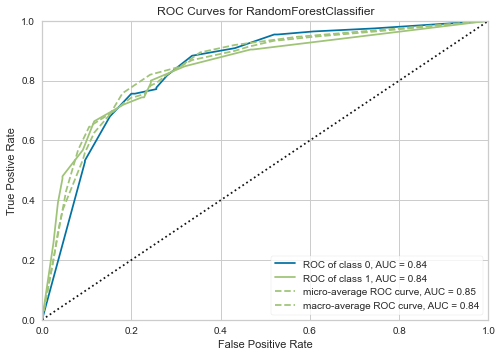

In [39]:
plot_model(rf)

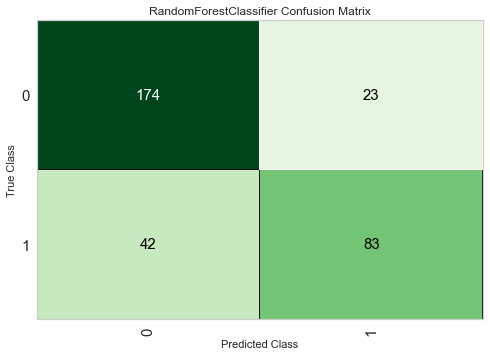

In [40]:
plot_model(rf, plot = 'confusion_matrix')

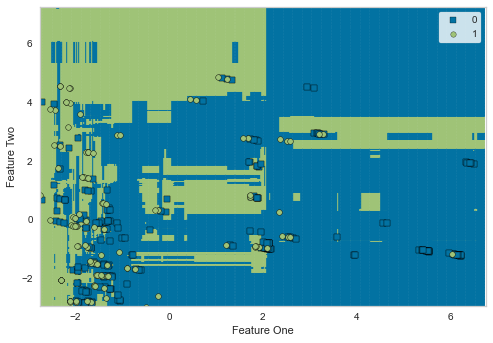

In [41]:
plot_model(rf, plot = 'boundary')

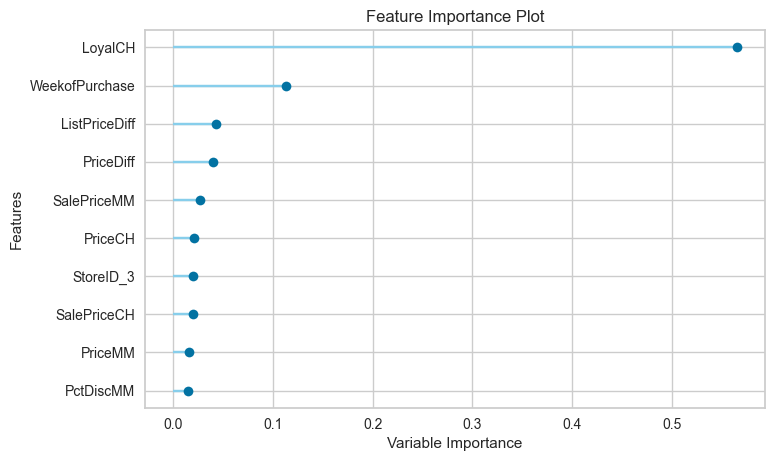

In [42]:
plot_model(rf, plot = 'feature')

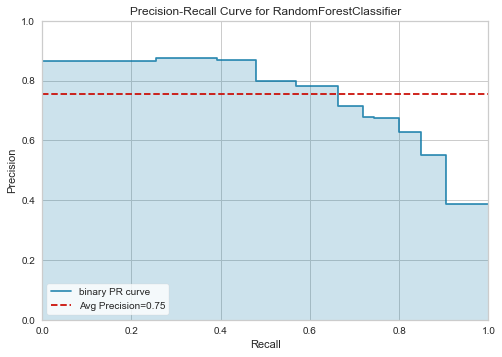

In [43]:
plot_model(rf, plot = 'pr')

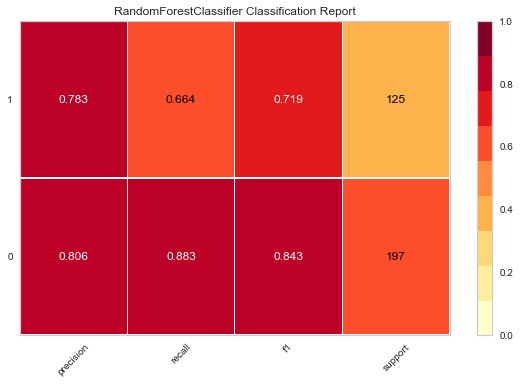

In [44]:
plot_model(rf, plot = 'class_report')

In [45]:
evaluate_model(rf)

,Parameters
bootstrap,True
ccp_alpha,0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


# 10. Interpret Model

In [51]:
catboost = create_model('catboost', cross_validation=False)

INFO:logs:create_model_container 10
INFO:logs:master_model_container 10
INFO:logs:display_container 11
INFO:logs:<catboost.core.CatBoostClassifier object at 0x1414b9670>
INFO:logs:create_models() succesfully completed......................................


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x1414b9670>, plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


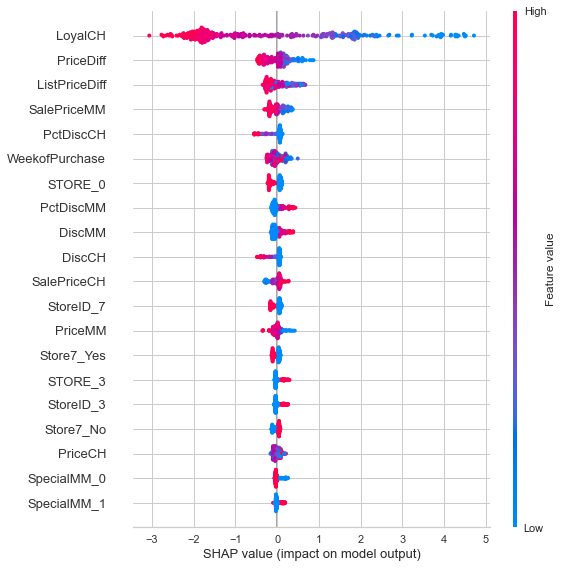

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [52]:
interpret_model(catboost)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x1414b9670>, plot=correlation, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: correlation
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


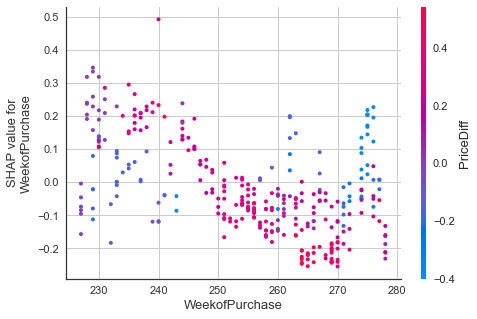

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [53]:
interpret_model(catboost, plot = 'correlation')

In [54]:
interpret_model(catboost, plot = 'reason', observation = 12)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x1414b9670>, plot=reason, feature=None, observation=12)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: reason
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


# 11. AutoML()

In [55]:
best = automl(optimize = 'Recall')
best

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=5.5600000000000005, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Logistic Regression Imported succesfully
INFO:logs:Checking ensemble method
INFO:logs:Initializing Fold 1
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling M

LogisticRegression(C=5.5600000000000005, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 12. Predict Model

In [56]:
pred_holdouts = predict_model(lr)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8416,0.9049,0.768,0.8136,0.7901,0.6631,0.6638


,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,...,Store7_No,Store7_Yes,STORE_0,STORE_1,STORE_2,STORE_3,STORE_4,Purchase,Label,Score
0,260.0,1.86,2.18,0.0,0.70,0.959305,1.48,1.86,-0.38,0.321101,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,CH,CH,0.1876
1,229.0,1.69,1.69,0.0,0.00,0.795200,1.69,1.69,0.00,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,CH,CH,0.1915
2,261.0,1.86,2.13,0.0,0.24,0.588965,1.89,1.86,0.03,0.112676,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,CH,CH,0.2534
3,247.0,1.99,2.23,0.0,0.00,0.003689,2.23,1.99,0.24,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,MM,MM,0.9127
4,271.0,1.99,2.09,0.1,0.40,0.973612,1.69,1.89,-0.20,0.191388,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,CH,CH,0.1895


In [57]:
new_data = data.copy()
new_data.drop(['Purchase'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Label,Score
0,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,CH,0.4741
1,2,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,MM,0.5433
2,3,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,CH,0.1670
3,4,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,MM,0.7475
4,5,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,CH,0.0492


# 13. Save / Load Model

In [58]:
save_model(best, model_name='best-model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=5.5600000000000005, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=best-model, model_only=False, verbose=True)
INFO:logs:Adding model into prep_pipe
INFO:logs:best-model.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
    

Transformation Pipeline and Model Succesfully Saved


In [59]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_L...
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty()),
                ['trained model',
                 LogisticRegression(C=5.5600000000000005,
                                    class_weight='balance

In [60]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], ml_usecase='classification',
                     numerical_features=[], target='Purchase',
                     time_features=[])

In [61]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [62]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

TypeError: deploy_model() missing 1 required positional argument: 'platform'

# 15. Get Config / Set Config

In [ ]:
X_train = get_config('X_train')
X_train.head()

In [ ]:
get_config('seed')

In [ ]:
from pycaret.classification import set_config
set_config('seed', 999)

In [ ]:
get_config('seed')

# 16. MLFlow UI

In [ ]:
# !mlflow ui

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org